In [45]:
import numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
name_envs =["CartPole-v0","LunarLander-v2"]
res_spg = []
res_ppo= []
for name_env in name_envs :
    with open('results/simple_pg_results_{}.pkl'.format(name_env),'rb') as f :
        res = pickle.load(f)
        res_spg.append(pd.DataFrame(res))
    with open('results/ppo_results_{}.pkl'.format(name_env),'rb') as f :
        res = pickle.load(f)
        res_ppo.append(pd.DataFrame(res))

## Plotting results

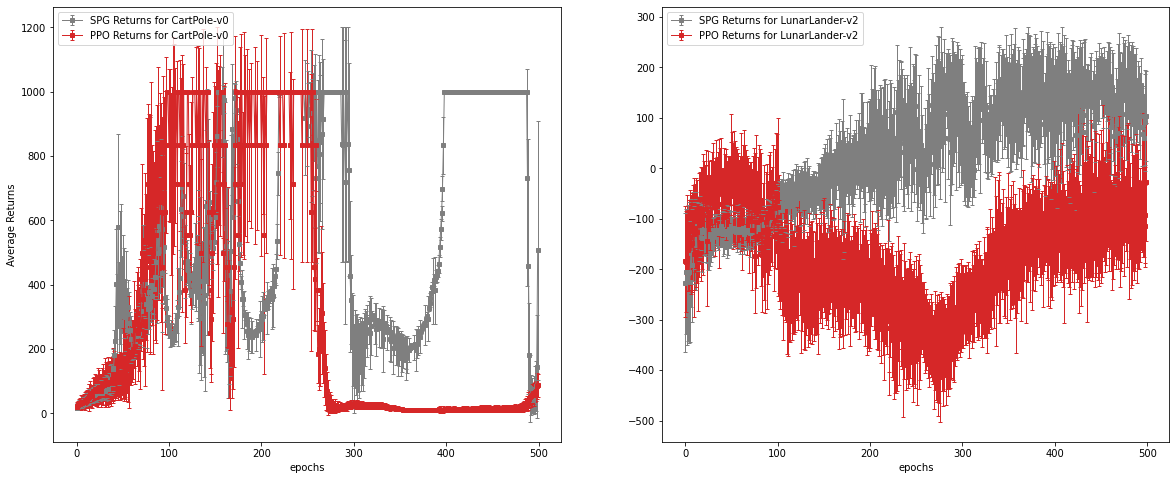

In [58]:
fig, ax = plt.subplots(1,len(res_spg),figsize=(20,8))
for i , (name_env,res1,res2) in enumerate(zip(name_envs,res_spg,res_ppo)):
    ax[i].errorbar(x= res1.index,y=res1.returns, yerr=res1.std_return, 
                marker='s', capsize=2,color='tab:gray', markersize=4, linewidth=1,
                label='SPG Returns for {}'.format(name_env))
    ax[i].errorbar(x= res2.index,y=res2.returns, yerr=res2.std_return, 
                marker='s', capsize=2,color='tab:red', markersize=4, linewidth=1,
                label='PPO Returns for {}'.format(name_env))
    #ax[0].set_yscale("log")
    ax[i].set_xlabel("epochs")
    ax[0].set_ylabel("Average Returns")
    ax[i].legend(loc='upper left')
plt.savefig('./results/avg_returns.png')
plt.show()

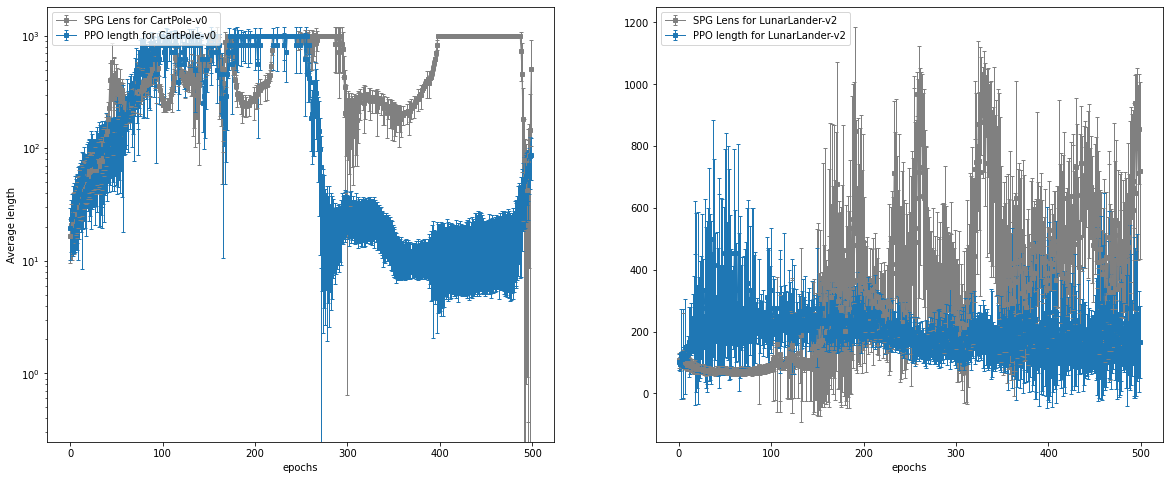

In [57]:
fig, ax = plt.subplots(1,len(res_spg),figsize=(20,8))
for i , (name_env,res1,res2) in enumerate(zip(name_envs,res_spg,res_ppo)):
    ax[i].errorbar(x= res1.index,y=res1.lens, yerr=res1.std_lens, 
                marker='s', capsize=2,color='gray', markersize=4, linewidth=1,
                label='SPG Lens for {}'.format(name_env))
    ax[i].errorbar(x= res2.index,y=res2.lens, yerr=res2.std_lens, 
                marker='s', capsize=2,color='tab:blue', markersize=4, linewidth=1,
                label='PPO length for {}'.format(name_env))
    ax[0].set_yscale("log")
    ax[i].set_xlabel("epochs")
    ax[0].set_ylabel("Average length")
    ax[i].legend(loc='upper left')
plt.savefig('./results/avg_lengths.png')
plt.show()